In [99]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xlsxwriter
import xgboost  as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import metrics, svm, tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, matthews_corrcoef, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier 

In [2]:
# Loading the dataset
df=pd.read_csv("C://Users//Mohammad//Desktop//data//DF.csv")
df=df.drop('ID',axis=1)
df.head(3)

,Sexuality,Age,Pregnancy status,Blood pressure,Heart disease,Kidney disease,Diabetes,Liver disease,Lung disease,Immune Deficiency disease,Risk level
0,1,64,0,0,0,0,0,0,0,0,2
1,0,49,0,0,0,0,0,0,0,0,1
2,0,57,0,1,1,0,0,0,0,0,3


In [3]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [4]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [5]:
# Defining evaluation function
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"MMC SCORE:\n{matthews_corrcoef(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"MCC SCORE:\n{matthews_corrcoef(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Random Forest

In [6]:
# Defining parameters range 
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
               'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
               'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               'bootstrap': [True, False]}

In [7]:
# RF training
rf = RandomForestClassifier()

rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose = 2, n_jobs = 4)
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 32400 candidates, totalling 162000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 272 tasks      | elapsed:    9.8s
[Parallel(n_jobs=4)]: Done 678 tasks      | elapsed:   20.1s
[Parallel(n_jobs=4)]: Done 1244 tasks      | elapsed:   35.2s
[Parallel(n_jobs=4)]: Done 1974 tasks      | elapsed:   53.7s
[Parallel(n_jobs=4)]: Done 2864 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 3918 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 5132 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 6510 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 8048 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 9750 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 11612 tasks      | elapsed:  5.2min
[Parallel(n_jobs=4)]: Done 13638 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 15824 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done 18174 tasks      | elapsed:  8

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [8]:
# RF best parameters with gridCV
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 10}

In [72]:
# evaluation
evaluate(rf_Grid , X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 45   8   0   0]
 [  8 579   0   0]
 [  0   0 184   2]
 [  0   0   1  47]]
ACCURACY SCORE:
0.9783
MMC SCORE:
0.9563
CLASSIFICATION REPORT:
                   1           2           3          4  accuracy   macro avg  \
precision   0.849057    0.986371    0.994595   0.959184  0.978261    0.947302   
recall      0.849057    0.986371    0.989247   0.979167  0.978261    0.950960   
f1-score    0.849057    0.986371    0.991914   0.969072  0.978261    0.949103   
support    53.000000  587.000000  186.000000  48.000000  0.978261  874.000000   

           weighted avg  
precision      0.978301  
recall         0.978261  
f1-score       0.978274  
support      874.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[  7   5   0   0]
 [  6 144   0   0]
 [  0   0  46   0]
 [  0   0   3   8]]
ACCURACY SCORE:
0.9361
MCC SCORE:
0.8677
CLASSIFICATION REPORT:
                   1           2          3          4  accuracy   macro avg  \
precision   0.538462    0.9664

# Extra Trees

In [11]:
ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train,y_train)

ExtraTreesClassifier(max_features=7, n_estimators=1000, random_state=42)

In [12]:
# evaluation
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 46   7   0   0]
 [  7 580   0   0]
 [  0   0 186   0]
 [  0   0   1  47]]
ACCURACY SCORE:
0.9828
MMC SCORE:
0.9655
CLASSIFICATION REPORT:
                   1           2           3          4  accuracy   macro avg  \
precision   0.867925    0.988075    0.994652   1.000000  0.982838    0.962663   
recall      0.867925    0.988075    1.000000   0.979167  0.982838    0.958792   
f1-score    0.867925    0.988075    0.997319   0.989474  0.982838    0.960698   
support    53.000000  587.000000  186.000000  48.000000  0.982838  874.000000   

           weighted avg  
precision      0.982844  
recall         0.982838  
f1-score       0.982833  
support      874.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[  8   4   0   0]
 [  6 144   0   0]
 [  0   0  44   2]
 [  0   0   3   8]]
ACCURACY SCORE:
0.9315
MCC SCORE:
0.8594
CLASSIFICATION REPORT:
                   1           2          3          4  accuracy   macro avg  \
precision   0.571429    0.9729

# Stochastic Gradient Boosting

In [13]:
grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [14]:
#evaluation
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 43  10   0   0]
 [  6 581   0   0]
 [  0   0 185   1]
 [  0   0   0  48]]
ACCURACY SCORE:
0.9805
MMC SCORE:
0.9607
CLASSIFICATION REPORT:
                   1           2           3          4  accuracy   macro avg  \
precision   0.877551    0.983080    1.000000   0.979592  0.980549    0.960056   
recall      0.811321    0.989779    0.994624   1.000000  0.980549    0.948931   
f1-score    0.843137    0.986418    0.997305   0.989691  0.980549    0.954138   
support    53.000000  587.000000  186.000000  48.000000  0.980549  874.000000   

           weighted avg  
precision      0.980090  
recall         0.980549  
f1-score       0.980226  
support      874.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[  7   5   0   0]
 [  6 144   0   0]
 [  0   0  44   2]
 [  0   0   3   8]]
ACCURACY SCORE:
0.9269
MCC SCORE:
0.8489
CLASSIFICATION REPORT:
                   1           2          3          4  accuracy   macro avg  \
precision   0.538462    0.9664

# XG Boost

In [15]:
xgb_Classifier= xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,verbosity=0, nthread = -1)
xgb_Classifier.fit(X_train, y_train)

C:\Users\Mostafa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1.7817, missing=nan, monotone_constraints='()',
              n_estimators=2200, n_jobs=8, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.464,
              reg_lambda=0.8571, scale_pos_weight=None, subsample=0.5213,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [16]:
#evaluation
evaluate(xgb_Classifier, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 42  11   0   0]
 [  5 582   0   0]
 [  1   3 181   1]
 [  0   0   5  43]]
ACCURACY SCORE:
0.9703
MMC SCORE:
0.9396
CLASSIFICATION REPORT:
                   1           2           3          4  accuracy   macro avg  \
precision   0.875000    0.976510    0.973118   0.977273  0.970252    0.950475   
recall      0.792453    0.991482    0.973118   0.895833  0.970252    0.913222   
f1-score    0.831683    0.983939    0.973118   0.934783  0.970252    0.930881   
support    53.000000  587.000000  186.000000  48.000000  0.970252  874.000000   

           weighted avg  
precision      0.969674  
recall         0.970252  
f1-score       0.969704  
support      874.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[  7   5   0   0]
 [  6 143   1   0]
 [  1   1  44   0]
 [  0   0   4   7]]
ACCURACY SCORE:
0.9178
MCC SCORE:
0.8300
CLASSIFICATION REPORT:
                   1           2          3          4  accuracy   macro avg  \
precision   0.500000    0.9597

# Light GBM

In [17]:
lgbm_Classifier= lgb.LGBMClassifier(objective = 'multiclass',boosting_type='gbdt',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lgbm_Classifier.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
               feature_fraction=0.2319, feature_fraction_seed=9,
               learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
               min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5,
               objective='multiclass')

In [18]:
#evaluation
evaluate(lgbm_Classifier, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 37  16   0   0]
 [ 18 569   0   0]
 [  6  47 132   1]
 [  0   0  21  27]]
ACCURACY SCORE:
0.8753
MMC SCORE:
0.7403
CLASSIFICATION REPORT:
                   1           2           3          4  accuracy   macro avg  \
precision   0.606557    0.900316    0.862745   0.964286  0.875286    0.833476   
recall      0.698113    0.969336    0.709677   0.562500  0.875286    0.734907   
f1-score    0.649123    0.933552    0.778761   0.710526  0.875286    0.767991   
support    53.000000  587.000000  186.000000  48.000000  0.875286  874.000000   

           weighted avg  
precision      0.878020  
recall         0.875286  
f1-score       0.871114  
support      874.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[  7   5   0   0]
 [  4 146   0   0]
 [  1  16  29   0]
 [  0   0   5   6]]
ACCURACY SCORE:
0.8584
MCC SCORE:
0.6900
CLASSIFICATION REPORT:
                   1           2          3          4  accuracy   macro avg  \
precision   0.583333    0.8742

# Cat Boost

In [19]:
#Fit catboost model
catboost = CatBoostClassifier() 
catboost.fit(X_train, y_train)

Learning rate set to 0.078585
0:	learn: 1.2314364	total: 165ms	remaining: 2m 44s
1:	learn: 1.0893527	total: 168ms	remaining: 1m 24s
2:	learn: 0.9809196	total: 172ms	remaining: 57.2s
3:	learn: 0.8909890	total: 176ms	remaining: 43.7s
4:	learn: 0.8243990	total: 178ms	remaining: 35.5s
5:	learn: 0.7627448	total: 181ms	remaining: 29.9s
6:	learn: 0.7044792	total: 184ms	remaining: 26.2s
7:	learn: 0.6595786	total: 188ms	remaining: 23.3s
8:	learn: 0.6160724	total: 192ms	remaining: 21.2s
9:	learn: 0.5763577	total: 196ms	remaining: 19.4s
10:	learn: 0.5411955	total: 200ms	remaining: 17.9s
11:	learn: 0.5099439	total: 203ms	remaining: 16.8s
12:	learn: 0.4784498	total: 207ms	remaining: 15.7s
13:	learn: 0.4525954	total: 211ms	remaining: 14.8s
14:	learn: 0.4311525	total: 214ms	remaining: 14.1s
15:	learn: 0.4171225	total: 216ms	remaining: 13.3s
16:	learn: 0.3995483	total: 219ms	remaining: 12.7s
17:	learn: 0.3810624	total: 222ms	remaining: 12.1s
18:	learn: 0.3686190	total: 224ms	remaining: 11.6s
19:	learn

212:	learn: 0.0707687	total: 900ms	remaining: 3.32s
213:	learn: 0.0706464	total: 904ms	remaining: 3.32s
214:	learn: 0.0704485	total: 907ms	remaining: 3.31s
215:	learn: 0.0702808	total: 911ms	remaining: 3.31s
216:	learn: 0.0701563	total: 916ms	remaining: 3.3s
217:	learn: 0.0699837	total: 919ms	remaining: 3.3s
218:	learn: 0.0698903	total: 923ms	remaining: 3.29s
219:	learn: 0.0697394	total: 927ms	remaining: 3.28s
220:	learn: 0.0696537	total: 930ms	remaining: 3.28s
221:	learn: 0.0695078	total: 933ms	remaining: 3.27s
222:	learn: 0.0693825	total: 937ms	remaining: 3.27s
223:	learn: 0.0691331	total: 941ms	remaining: 3.26s
224:	learn: 0.0690026	total: 944ms	remaining: 3.25s
225:	learn: 0.0689011	total: 948ms	remaining: 3.25s
226:	learn: 0.0688056	total: 951ms	remaining: 3.24s
227:	learn: 0.0686456	total: 955ms	remaining: 3.23s
228:	learn: 0.0685456	total: 959ms	remaining: 3.23s
229:	learn: 0.0684207	total: 963ms	remaining: 3.22s
230:	learn: 0.0683168	total: 966ms	remaining: 3.22s
231:	learn: 0.

398:	learn: 0.0564157	total: 1.62s	remaining: 2.44s
399:	learn: 0.0563530	total: 1.62s	remaining: 2.44s
400:	learn: 0.0563218	total: 1.63s	remaining: 2.43s
401:	learn: 0.0562686	total: 1.63s	remaining: 2.43s
402:	learn: 0.0562483	total: 1.64s	remaining: 2.42s
403:	learn: 0.0562177	total: 1.64s	remaining: 2.42s
404:	learn: 0.0561893	total: 1.64s	remaining: 2.41s
405:	learn: 0.0561302	total: 1.65s	remaining: 2.41s
406:	learn: 0.0560920	total: 1.65s	remaining: 2.4s
407:	learn: 0.0560599	total: 1.65s	remaining: 2.4s
408:	learn: 0.0560378	total: 1.66s	remaining: 2.39s
409:	learn: 0.0559975	total: 1.66s	remaining: 2.39s
410:	learn: 0.0559663	total: 1.66s	remaining: 2.38s
411:	learn: 0.0559437	total: 1.67s	remaining: 2.38s
412:	learn: 0.0559199	total: 1.67s	remaining: 2.37s
413:	learn: 0.0559029	total: 1.67s	remaining: 2.37s
414:	learn: 0.0558551	total: 1.68s	remaining: 2.36s
415:	learn: 0.0558393	total: 1.68s	remaining: 2.36s
416:	learn: 0.0558071	total: 1.68s	remaining: 2.35s
417:	learn: 0.

595:	learn: 0.0509448	total: 2.36s	remaining: 1.6s
596:	learn: 0.0509172	total: 2.36s	remaining: 1.6s
597:	learn: 0.0509086	total: 2.37s	remaining: 1.59s
598:	learn: 0.0508914	total: 2.37s	remaining: 1.59s
599:	learn: 0.0508615	total: 2.38s	remaining: 1.58s
600:	learn: 0.0508451	total: 2.38s	remaining: 1.58s
601:	learn: 0.0508332	total: 2.38s	remaining: 1.57s
602:	learn: 0.0508133	total: 2.38s	remaining: 1.57s
603:	learn: 0.0507827	total: 2.39s	remaining: 1.57s
604:	learn: 0.0507750	total: 2.39s	remaining: 1.56s
605:	learn: 0.0507591	total: 2.4s	remaining: 1.56s
606:	learn: 0.0507437	total: 2.4s	remaining: 1.55s
607:	learn: 0.0507329	total: 2.4s	remaining: 1.55s
608:	learn: 0.0507031	total: 2.41s	remaining: 1.54s
609:	learn: 0.0506908	total: 2.41s	remaining: 1.54s
610:	learn: 0.0506848	total: 2.41s	remaining: 1.54s
611:	learn: 0.0506715	total: 2.42s	remaining: 1.53s
612:	learn: 0.0506623	total: 2.42s	remaining: 1.53s
613:	learn: 0.0506541	total: 2.42s	remaining: 1.52s
614:	learn: 0.050

793:	learn: 0.0476893	total: 3.1s	remaining: 805ms
794:	learn: 0.0476772	total: 3.1s	remaining: 801ms
795:	learn: 0.0476733	total: 3.13s	remaining: 801ms
796:	learn: 0.0476191	total: 3.13s	remaining: 797ms
797:	learn: 0.0476106	total: 3.13s	remaining: 793ms
798:	learn: 0.0475956	total: 3.14s	remaining: 789ms
799:	learn: 0.0475912	total: 3.14s	remaining: 785ms
800:	learn: 0.0475829	total: 3.14s	remaining: 781ms
801:	learn: 0.0475756	total: 3.15s	remaining: 777ms
802:	learn: 0.0475673	total: 3.15s	remaining: 773ms
803:	learn: 0.0475637	total: 3.16s	remaining: 769ms
804:	learn: 0.0475607	total: 3.16s	remaining: 765ms
805:	learn: 0.0475443	total: 3.16s	remaining: 761ms
806:	learn: 0.0475308	total: 3.17s	remaining: 757ms
807:	learn: 0.0475214	total: 3.17s	remaining: 753ms
808:	learn: 0.0475090	total: 3.17s	remaining: 749ms
809:	learn: 0.0475047	total: 3.18s	remaining: 746ms
810:	learn: 0.0474921	total: 3.18s	remaining: 742ms
811:	learn: 0.0474847	total: 3.19s	remaining: 738ms
812:	learn: 0.

971:	learn: 0.0460823	total: 3.83s	remaining: 110ms
972:	learn: 0.0460802	total: 3.83s	remaining: 106ms
973:	learn: 0.0460789	total: 3.84s	remaining: 102ms
974:	learn: 0.0460730	total: 3.84s	remaining: 98.5ms
975:	learn: 0.0460701	total: 3.85s	remaining: 94.6ms
976:	learn: 0.0459966	total: 3.85s	remaining: 90.6ms
977:	learn: 0.0459948	total: 3.85s	remaining: 86.7ms
978:	learn: 0.0459910	total: 3.86s	remaining: 82.7ms
979:	learn: 0.0459796	total: 3.86s	remaining: 78.8ms
980:	learn: 0.0459734	total: 3.86s	remaining: 74.9ms
981:	learn: 0.0459694	total: 3.87s	remaining: 70.9ms
982:	learn: 0.0459679	total: 3.87s	remaining: 67ms
983:	learn: 0.0459625	total: 3.88s	remaining: 63ms
984:	learn: 0.0459416	total: 3.88s	remaining: 59.1ms
985:	learn: 0.0458732	total: 3.88s	remaining: 55.1ms
986:	learn: 0.0458698	total: 3.89s	remaining: 51.2ms
987:	learn: 0.0458674	total: 3.89s	remaining: 47.2ms
988:	learn: 0.0458636	total: 3.89s	remaining: 43.3ms
989:	learn: 0.0458548	total: 3.9s	remaining: 39.4ms
9

In [20]:
# Print classification report 
catboost_predictions = catboost.predict(X_test) 
print(classification_report(y_test, catboost_predictions))

              precision    recall  f1-score   support

           1       0.57      0.67      0.62        12
           2       0.97      0.95      0.96       150
           3       0.90      1.00      0.95        46
           4       1.00      0.64      0.78        11

    accuracy                           0.93       219
   macro avg       0.86      0.81      0.83       219
weighted avg       0.94      0.93      0.93       219



In [21]:
#evaluation
evaluate(catboost, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 45   8   0   0]
 [  6 581   0   0]
 [  0   0 185   1]
 [  0   0   0  48]]
ACCURACY SCORE:
0.9828
MMC SCORE:
0.9654
CLASSIFICATION REPORT:
                   1           2           3          4  accuracy   macro avg  \
precision   0.882353    0.986418    1.000000   0.979592  0.982838    0.962091   
recall      0.849057    0.989779    0.994624   1.000000  0.982838    0.958365   
f1-score    0.865385    0.988095    0.997305   0.989691  0.982838    0.960119   
support    53.000000  587.000000  186.000000  48.000000  0.982838  874.000000   

           weighted avg  
precision      0.982623  
recall         0.982838  
f1-score       0.982701  
support      874.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[  8   4   0   0]
 [  6 143   1   0]
 [  0   0  46   0]
 [  0   0   4   7]]
ACCURACY SCORE:
0.9315
MCC SCORE:
0.8602
CLASSIFICATION REPORT:
                   1           2          3          4  accuracy   macro avg  \
precision   0.571429    0.9727

# Voting Ensemble

In [73]:
estimators = []
estimators.append(('xgb_Classifier', xgb_Classifier))
estimators.append(('svm_grid',svm_grid ))
estimators.append(('rf_Grid',rf_Grid))
estimators.append(('grad_boost_clf', grad_boost_clf))
estimators.append(('ex_tree_clf',ex_tree_clf))

In [74]:
voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

C:\Users\Mostafa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.669, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.669, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.672, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.674, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.674, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.669, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.669, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.672, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.829, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.764, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.674, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.674, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.669, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.669, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.672, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.886, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.903, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.897, total=   0.1s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.674, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.674, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.669, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.669, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .

[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.926, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.937, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.914, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.931, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.943, total=   0.1s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.514, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.497, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.943, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.943, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.926, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.937, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.948, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  C=1000, gamma=0.0001, kernel=sigmoid, score=0.520, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  C=1000, gamma=0.0001, kernel=sigmoid, score=0.571, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    9.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 32400 candidates, totalling 162000 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 408 tasks      | elapsed:   14.2s
[Parallel(n_jobs=4)]: Done 1220 tasks      | elapsed:   36.8s
[Parallel(n_jobs=4)]: Done 2352 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 3812 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 5592 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 7700 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 10128 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done 12884 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 15960 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done 19364 tasks      | elapsed:  9.4min
[Parallel(n_jobs=4)]: Done 23088 tasks      | elapsed: 11.3min
[Parallel(n_jobs=4)]: Done 27140 tasks      | elapsed: 13.2min
[Parallel(n_jobs=4)]: Done 29972 tasks      | elapsed: 14.8min
[Parallel(n_jobs=4)]: Done 32322 tasks      | elapsed: 16.1min
[Parallel(n_jobs=4)]: Done 34832 tasks      | elapsed: 17.5min
[

VotingClassifier(estimators=[('xgb_Classifier',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.4603,
                                            gamma=0.0468, gpu_id=-1,
                                            importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.05,
                                            max_delta_step=0, max_depth=3,
                                            min_child_weight=1.7817,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimator...
                                                       'max_depth': [2, 

In [75]:
#evaluation
evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 44   9   0   0]
 [  6 581   0   0]
 [  0   0 185   1]
 [  0   0   1  47]]
ACCURACY SCORE:
0.9805
MMC SCORE:
0.9607
CLASSIFICATION REPORT:
                   1           2           3          4  accuracy   macro avg  \
precision   0.880000    0.984746    0.994624   0.979167  0.980549    0.959634   
recall      0.830189    0.989779    0.994624   0.979167  0.980549    0.948439   
f1-score    0.854369    0.987256    0.994624   0.979167  0.980549    0.953854   
support    53.000000  587.000000  186.000000  48.000000  0.980549  874.000000   

           weighted avg  
precision      0.980190  
recall         0.980549  
f1-score       0.980321  
support      874.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[  7   5   0   0]
 [  6 143   1   0]
 [  0   0  44   2]
 [  0   0   3   8]]
ACCURACY SCORE:
0.9224
MCC SCORE:
0.8403
CLASSIFICATION REPORT:
                   1           2          3          4  accuracy   macro avg  \
precision   0.538462    0.9662

# Decision Tree Classifier

In [22]:
dtc=DecisionTreeClassifier(criterion='entropy' , random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
#evaluation
evaluate(dtc, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 46   7   0   0]
 [  7 580   0   0]
 [  0   0 186   0]
 [  0   0   1  47]]
ACCURACY SCORE:
0.9828
MMC SCORE:
0.9655
CLASSIFICATION REPORT:
                   1           2           3          4  accuracy   macro avg  \
precision   0.867925    0.988075    0.994652   1.000000  0.982838    0.962663   
recall      0.867925    0.988075    1.000000   0.979167  0.982838    0.958792   
f1-score    0.867925    0.988075    0.997319   0.989474  0.982838    0.960698   
support    53.000000  587.000000  186.000000  48.000000  0.982838  874.000000   

           weighted avg  
precision      0.982844  
recall         0.982838  
f1-score       0.982833  
support      874.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[  7   5   0   0]
 [  6 144   0   0]
 [  0   0  46   0]
 [  0   0   3   8]]
ACCURACY SCORE:
0.9361
MCC SCORE:
0.8677
CLASSIFICATION REPORT:
                   1           2          3          4  accuracy   macro avg  \
precision   0.538462    0.9664

# SVM

In [24]:
# Defining parameters range 
svm_param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','sigmoid']}  

svm_grid = GridSearchCV(svm.SVC(), svm_param_grid, refit = True, verbose = 3)

In [25]:
# Fitting the model for grid search 
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.669, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.669, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.672, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.674, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.669, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.669, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.672, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.669, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.669, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.669, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.672, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.709, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.691, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.691, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.697, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.678, total=   0.0s
[CV] C

[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.669, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=10, gamma=0.01, kernel=sigmoid, score=0.672, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.783, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.766, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.794, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.789, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.747, total=   0.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] .

[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.469, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.566, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, gamma=0.001, kernel=sigmoid, score=0.460, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.783, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.800, total=   0.2s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.800, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.806, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    9.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [26]:
# Print best parameter after tuning 
print(svm_grid.best_params_) 
  
# Print how our model looks after hyper-parameter tuning 
print(svm_grid.best_estimator_) 

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [27]:
#evaluation
evaluate(svm_grid, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 43  10   0   0]
 [  7 579   1   0]
 [  0   3 179   4]
 [  0   0   4  44]]
ACCURACY SCORE:
0.9668
MMC SCORE:
0.9329
CLASSIFICATION REPORT:
                   1           2           3          4  accuracy   macro avg  \
precision   0.860000    0.978041    0.972826   0.916667  0.966819    0.931883   
recall      0.811321    0.986371    0.962366   0.916667  0.966819    0.919181   
f1-score    0.834951    0.982188    0.967568   0.916667  0.966819    0.925343   
support    53.000000  587.000000  186.000000  48.000000  0.966819  874.000000   

           weighted avg  
precision      0.966402  
recall         0.966819  
f1-score       0.966550  
support      874.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[  7   5   0   0]
 [  6 143   1   0]
 [  0   0  44   2]
 [  0   0   0  11]]
ACCURACY SCORE:
0.9361
MCC SCORE:
0.8692
CLASSIFICATION REPORT:
                   1           2          3          4  accuracy   macro avg  \
precision   0.538462    0.9662

# Logistic Regression

In [28]:
#Fit a multinomial logit model
logreg = LogisticRegression(multi_class="multinomial",solver="newton-cg")
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [29]:
#evaluation
evaluate(logreg, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 34  19   0   0]
 [  4 582   1   0]
 [  7   5 172   2]
 [  0   0  17  31]]
ACCURACY SCORE:
0.9371
MMC SCORE:
0.8709
CLASSIFICATION REPORT:
                   1           2           3          4  accuracy   macro avg  \
precision   0.755556    0.960396    0.905263   0.939394  0.937071    0.890152   
recall      0.641509    0.991482    0.924731   0.645833  0.937071    0.800889   
f1-score    0.693878    0.975692    0.914894   0.765432  0.937071    0.837474   
support    53.000000  587.000000  186.000000  48.000000  0.937071  874.000000   

           weighted avg  
precision      0.935088  
recall         0.937071  
f1-score       0.934116  
support      874.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[  6   6   0   0]
 [  2 147   1   0]
 [  1   2  43   0]
 [  0   0   3   8]]
ACCURACY SCORE:
0.9315
MCC SCORE:
0.8544
CLASSIFICATION REPORT:
                   1           2          3          4  accuracy   macro avg  \
precision   0.666667    0.9483

# K Neighbors

In [30]:
KNeighborsClassifier = KNeighborsClassifier() 
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
#evaluation
evaluate(KNeighborsClassifier, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 43  10   0   0]
 [ 14 573   0   0]
 [ 10  98  78   0]
 [  0  11  21  16]]
ACCURACY SCORE:
0.8124
MMC SCORE:
0.5980
CLASSIFICATION REPORT:
                   1           2           3          4  accuracy   macro avg  \
precision   0.641791    0.828035    0.787879   1.000000  0.812357    0.814426   
recall      0.811321    0.976150    0.419355   0.333333  0.812357    0.635040   
f1-score    0.716667    0.896013    0.547368   0.500000  0.812357    0.665012   
support    53.000000  587.000000  186.000000  48.000000  0.812357  874.000000   

           weighted avg  
precision      0.817639  
recall         0.812357  
f1-score       0.789191  
support      874.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[  6   6   0   0]
 [  6 143   1   0]
 [  1  32  13   0]
 [  0   4   3   4]]
ACCURACY SCORE:
0.7580
MCC SCORE:
0.4357
CLASSIFICATION REPORT:
                   1           2          3          4  accuracy   macro avg  \
precision   0.461538    0.7729

# Visualization

# # Confusion Matrix

<AxesSubplot:>

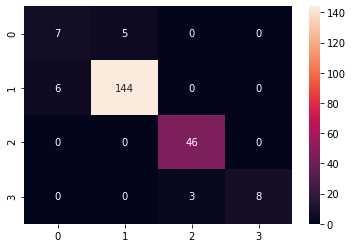

In [76]:
# Random Forest
cm_rf_Grid= confusion_matrix(y_test,rf_Grid.predict(X_test))
sns.heatmap(cm_rf_Grid,annot=True , fmt="d")

<AxesSubplot:>

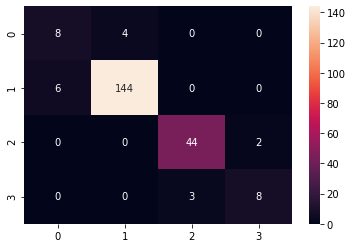

In [46]:
# Extra Trees
cm_ex_tree_clf= confusion_matrix(y_test,ex_tree_clf.predict(X_test))
sns.heatmap(cm_ex_tree_clf,annot=True , fmt="d")

<AxesSubplot:>

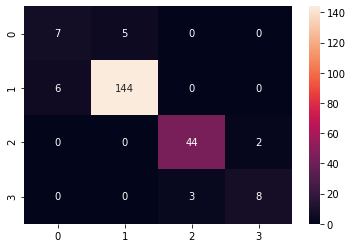

In [41]:
# Gradiant Boosting
cm_grad_boost_clf= confusion_matrix(y_test,grad_boost_clf.predict(X_test))
sns.heatmap(cm_grad_boost_clf ,annot=True , fmt="d")

<AxesSubplot:>

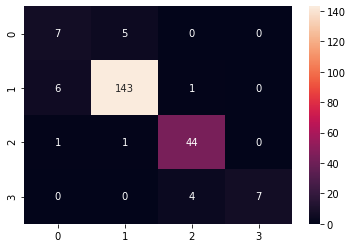

In [50]:
# XG Boosting
cm_xgb_Classifier= confusion_matrix(y_test,xgb_Classifier.predict(X_test))
sns.heatmap(cm_xgb_Classifier ,annot=True , fmt="d")

<AxesSubplot:>

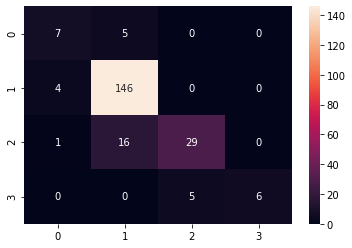

In [49]:
# Light GBM
cm_lgbm_Classifier= confusion_matrix(y_test,lgbm_Classifier.predict(X_test))
sns.heatmap(cm_lgbm_Classifier ,annot=True , fmt="d")

<AxesSubplot:>

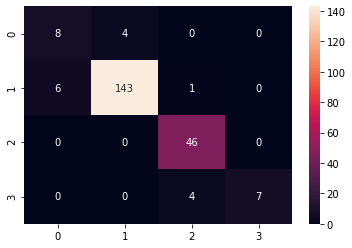

In [38]:
# Cat Bossting
cm_catboost= confusion_matrix(y_test,catboost.predict(X_test))
sns.heatmap(cm_catboost,annot=True , fmt="d")

<AxesSubplot:>

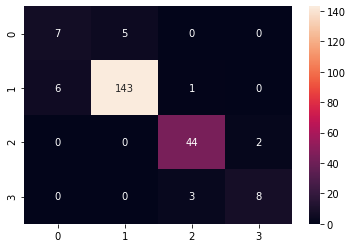

In [77]:
# Voting Ensemble
cm_voting= confusion_matrix(y_test,voting.predict(X_test))
sns.heatmap(cm_voting,annot=True , fmt="d")

<AxesSubplot:>

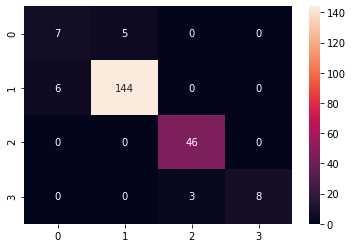

In [35]:
# Decision Trees
cm_dtc= confusion_matrix(y_test,dtc.predict(X_test))
sns.heatmap(cm_dtc,annot=True , fmt="d")

<AxesSubplot:>

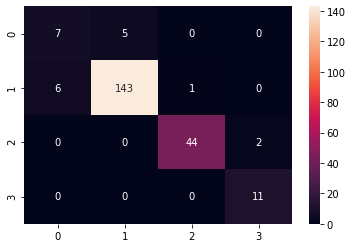

In [36]:
# SVM
cm_svm= confusion_matrix(y_test,svm_grid.predict(X_test))
sns.heatmap(cm_svm,annot=True , fmt="d")

<AxesSubplot:>

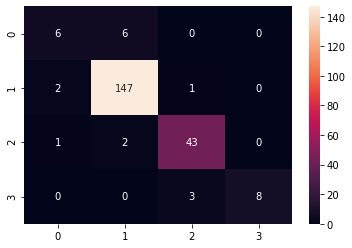

In [39]:
# Logestic Regression
cm_logreg= confusion_matrix(y_test,logreg.predict(X_test))
sns.heatmap(cm_logreg,annot=True , fmt="d")

<AxesSubplot:>

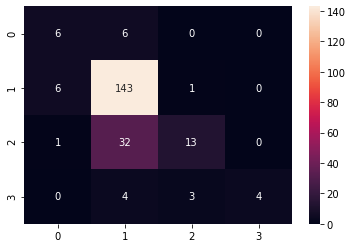

In [47]:
# KNN
cm_KNeighborsClassifier= confusion_matrix(y_test,KNeighborsClassifier.predict(X_test))
sns.heatmap(cm_KNeighborsClassifier ,annot=True , fmt="d")

# # Comparing

In [78]:
scores = {
    'Random Forest': {
        'Train': accuracy_score(y_train, rf_Grid.predict(X_train)),
        'Test': accuracy_score(y_test, rf_Grid.predict(X_test)),
    }   
}
scores['Extra Trees'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }
scores['Gradiant Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }
scores['xgboost'] = {
        'Train': accuracy_score(y_train, xgb_Classifier.predict(X_train)),
        'Test': accuracy_score(y_test, xgb_Classifier.predict(X_test)),
    }
scores['Light GMB'] = {
        'Train': accuracy_score(y_train, lgbm_Classifier.predict(X_train)),
        'Test': accuracy_score(y_test, lgbm_Classifier.predict(X_test)),
    }
scores['Catboost'] = {
        'Train': accuracy_score(y_train, catboost.predict(X_train)),
        'Test': accuracy_score(y_test, catboost.predict(X_test)),
    }
scores['Voting Ensemble'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }
scores['Decision Tree'] = {
        'Train': accuracy_score(y_train, dtc.predict(X_train)),
        'Test': accuracy_score(y_test, dtc.predict(X_test)),
    }
scores['SVM'] = {
        'Train': accuracy_score(y_train, svm_grid.predict(X_train)),
        'Test': accuracy_score(y_test, svm_grid.predict(X_test)),
    }
scores['Logistic Regression'] = {
        'Train': accuracy_score(y_train, logreg.predict(X_train)),
        'Test': accuracy_score(y_test, logreg.predict(X_test)),
    }
scores['KNN'] = {
        'Train': accuracy_score(y_train, KNeighborsClassifier.predict(X_train)),
        'Test': accuracy_score(y_test, KNeighborsClassifier.predict(X_test)),
    }

<AxesSubplot:>

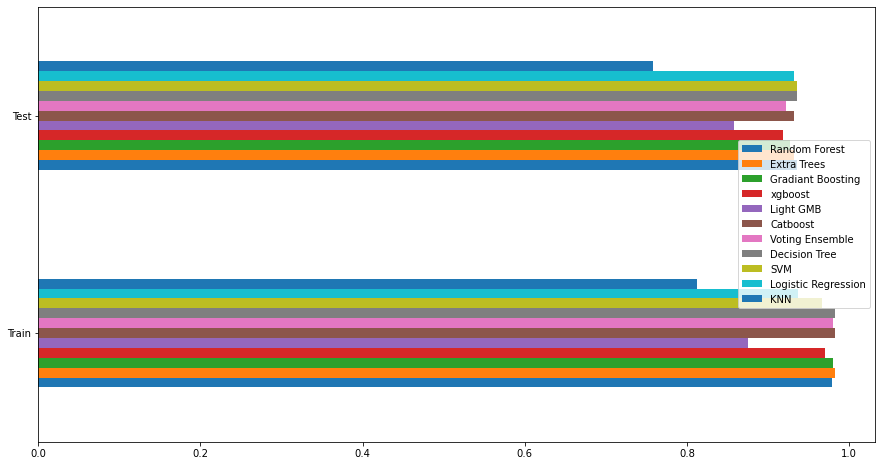

In [79]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

# Prediction

In [94]:
df2 = pd.read_csv("C://Users//Mohammad//Desktop//data//case study.csv")
df2.head(3)

,Sexuality,Age,Pregnancy status,Blood pressure,Heart disease,Kidney disease,Diabetes,Liver disease,Lung disease,Immune Deficiency disease
0,1,63,0,0,0,1,0,0,0,0
1,0,48,0,0,1,0,0,0,0,0
2,1,57,0,1,0,0,0,0,0,0


In [95]:
label = catboost.predict(df2)

In [96]:
# Adding label to the new dataset
d2 = df2.insert(loc=0, column ='label', value = label)

df2

,label,Sexuality,Age,Pregnancy status,Blood pressure,Heart disease,Kidney disease,Diabetes,Liver disease,Lung disease,Immune Deficiency disease
0,3,1,63,0,0,0,1,0,0,0,0
1,3,0,48,0,0,1,0,0,0,0,0
2,2,1,57,0,1,0,0,0,0,0,0
3,2,0,80,0,0,0,0,0,0,0,0
4,3,1,76,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
98,2,0,73,0,0,0,0,0,0,0,0
99,2,0,54,0,0,0,0,0,0,0,0
100,2,1,81,0,0,0,0,0,0,0,0
101,2,1,66,0,1,0,0,0,0,0,0


In [97]:
df_csv = df2.to_csv('df_csv', index=True)

In [98]:
print ('\nCSV String:\n', df_csv)


CSV String:
 None


In [106]:
writer = pd.ExcelWriter('caste stury results.xlsx', engine='xlsxwriter')

In [107]:
df2.to_excel(writer, sheet_name='Sheet1')

In [108]:
writer.save()